# Fit Varshni dei picchi reference

In [67]:
from picchi_GaAs import raccoglitore_2 # picchi reference
from QM2.varshni_subroutines import *

d_o_emi = ['0', '0o5', '1', '1o5', '2', '2o5', '3']#, '3o5']
d_o_ass = ['1', '0']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [68]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [69]:
for ass in d_o_ass:
    
    ass = 'ass=' + ass 
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        emi = 'emi=' + emi
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            ## REGIONE 1 ##
            if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                    picco_sx = 0
                else:
                    picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]

            elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
            else:
                picco_sx = 0
        
            
            ## REGIONE 2 ##
            # il più alto, ultimo elemento di help, è sempre il picco bulk
            help = sorted(raccoglitore_2[ass][emi][i]['Regione 2'], key=lambda x: x[3])
            
            # Caso con due elementi: il picco fisso è sempre l'ultimo
            if len(help) == 2:
                picco_dx = help[0][1]

            # Caso con tre elementi
            elif len(help) == 3:
                picco_dx = help[0][2] # il picco fisso è sempre l'ultimo
            
            else:
                print('Condizione imprevista!')
                
                
                
            if len(raccoglitore_2[ass][emi][i]['Regione 2']) > 0:
                
                picco_dx = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_2[ass][emi][i]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
               
            # conversione dei nm in eV degli errori
            err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [70]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

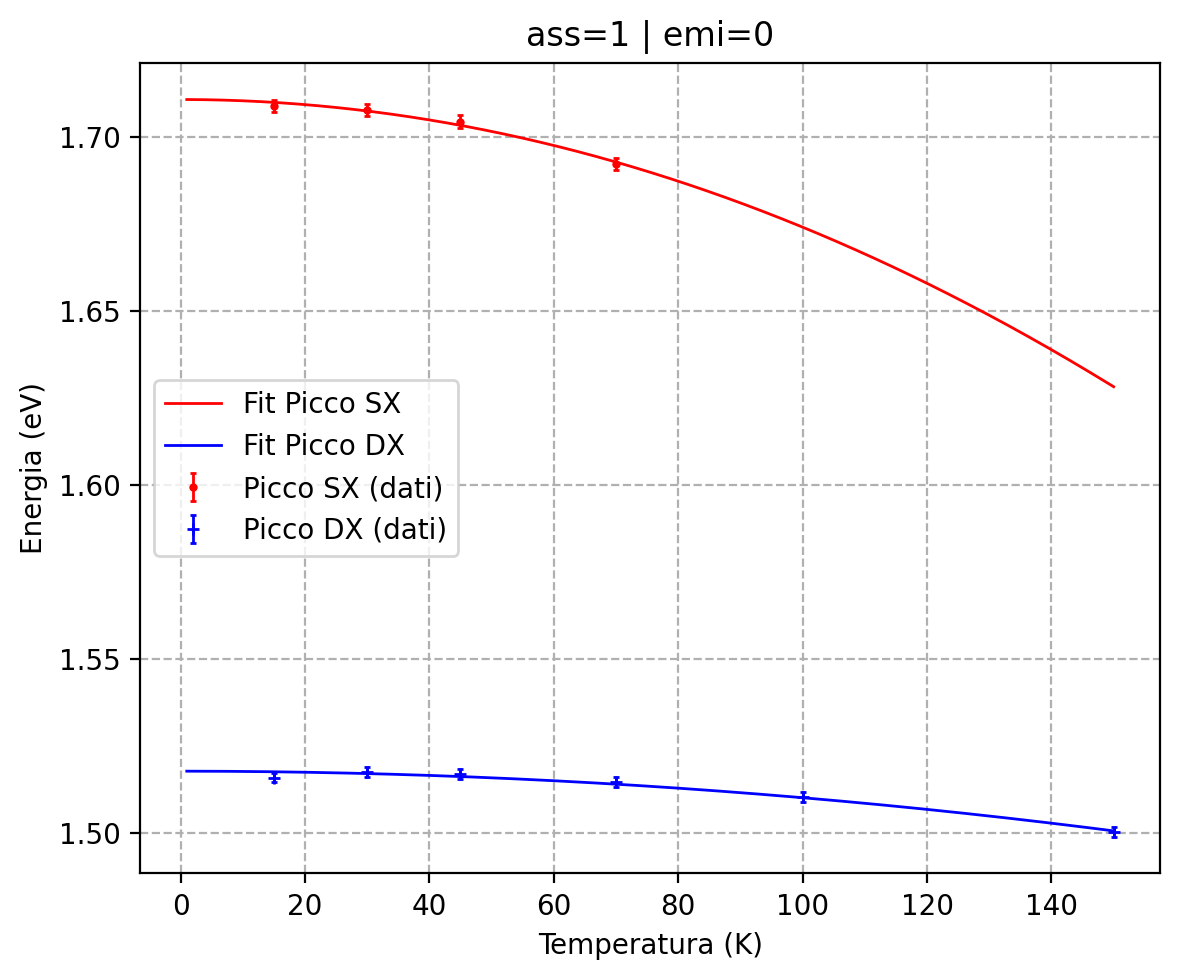

Parametri fit picco SX:
E_0 = 1.710855816888146 ± 0.001328829499187689 ; alpha = 50.70927559756971 ± 6.751981321840088 ; beta = 13817748.719958207 ± 2.477871077229914e-05
• Chi quadro: 0.780
• Gradi di libertà: 1
• Chi quadro ridotto: 0.780
• p-value: 3.772e-01
Parametri fit picco DX:
E_0 = 1.517770547811789 ± 0.0007528359880072443 ; alpha = 140.26139797553452 ± 13.274765193482777 ; beta = 183858308.01169416 ± 1.0127014843206427e-05
• Chi quadro: 2.116
• Gradi di libertà: 3
• Chi quadro ridotto: 0.705
• p-value: 5.487e-01


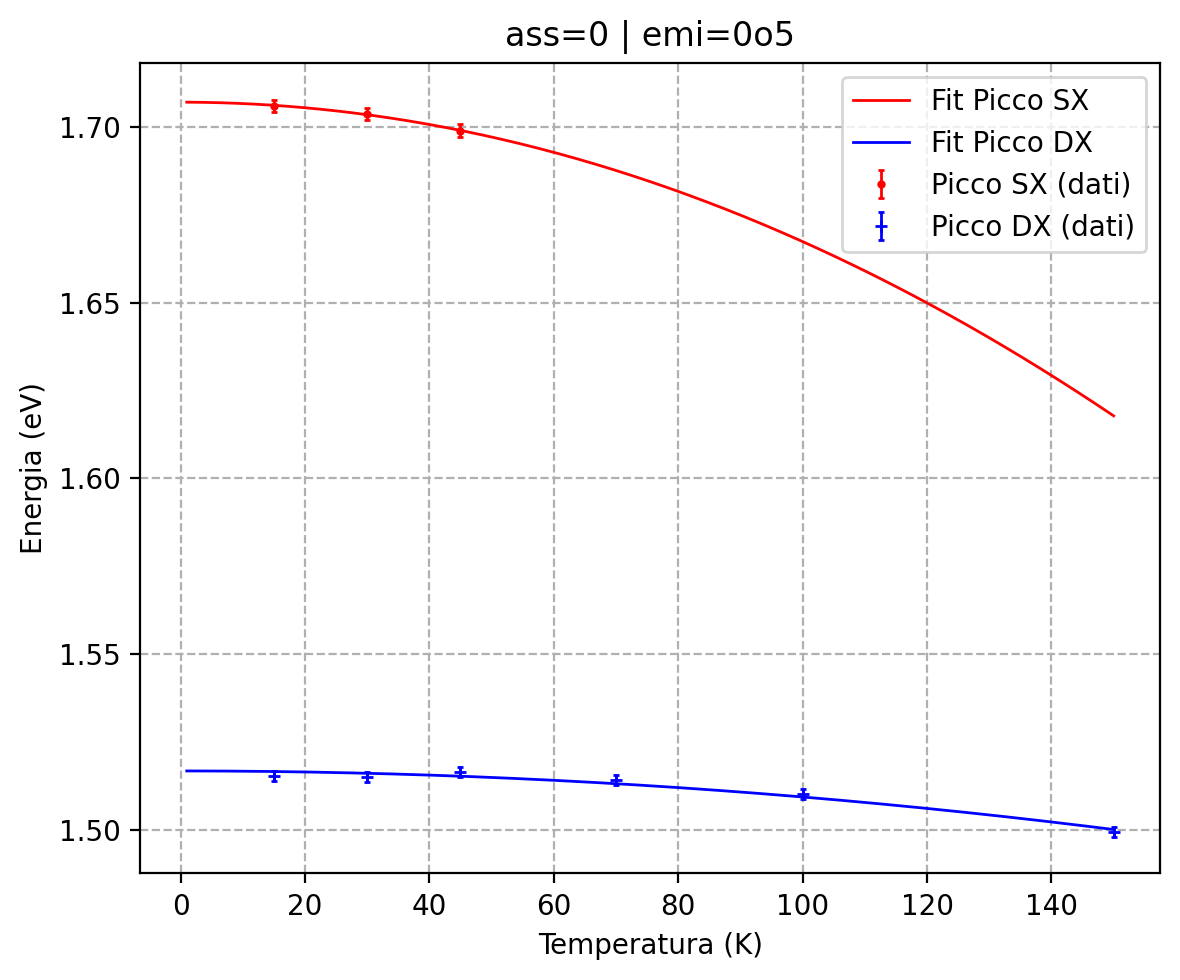

Parametri fit picco SX:
E_0 = 1.7070748414770252 ± 0.0017605451716324752 ; alpha = 49.08616437963153 ± 16.87313987579942 ; beta = 12369682.446237067 ± 6.69569467834412e-05
• Chi quadro: 0.017
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5167238953583246 ± 0.0007517305887360971 ; alpha = 36.41340292210667 ± 3.54294376999022 ; beta = 49136053.971540585 ± 2.625573176654602e-06
• Chi quadro: 3.302
• Gradi di libertà: 3
• Chi quadro ridotto: 1.101
• p-value: 3.474e-01


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_16547/3206013113.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


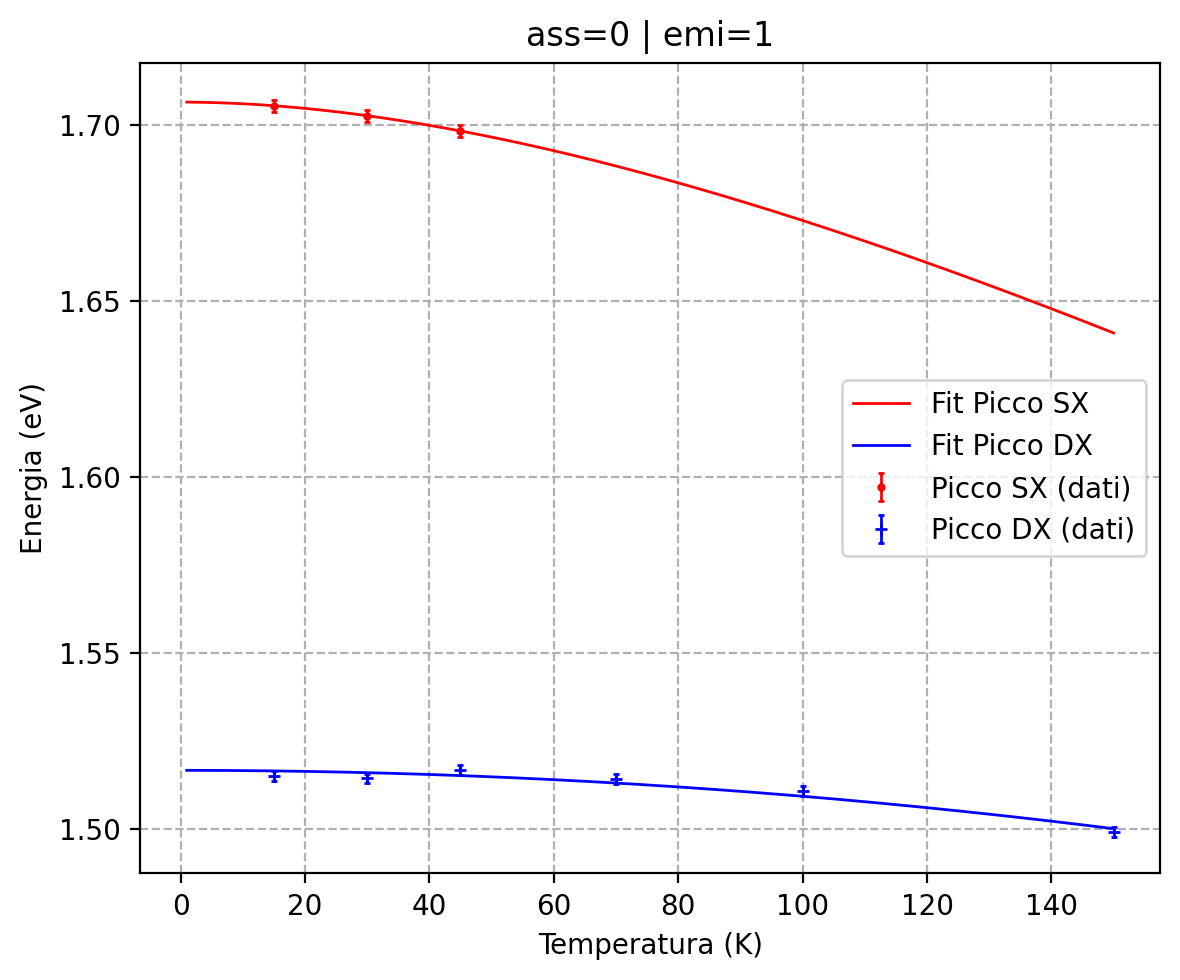

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_16547/3206013113.py:96: RuntimeWarning: invalid value encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


Parametri fit picco SX:
E_0 = 1.7065459745365317 ± 0.003533001590667958 ; alpha = 0.0010948635835465435 ± 0.015563573433983156 ; beta = 225.34788893936107 ± 3923.538862707276
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: nan
• p-value: nan
Parametri fit picco DX:
E_0 = 1.516585218885907 ± 0.0007515224236655031 ; alpha = 49.4947063444164 ± 4.837385811231752 ; beta = 67112561.72797664 ± 3.5675031663671833e-06
• Chi quadro: 5.751
• Gradi di libertà: 3
• Chi quadro ridotto: 1.917
• p-value: 1.243e-01


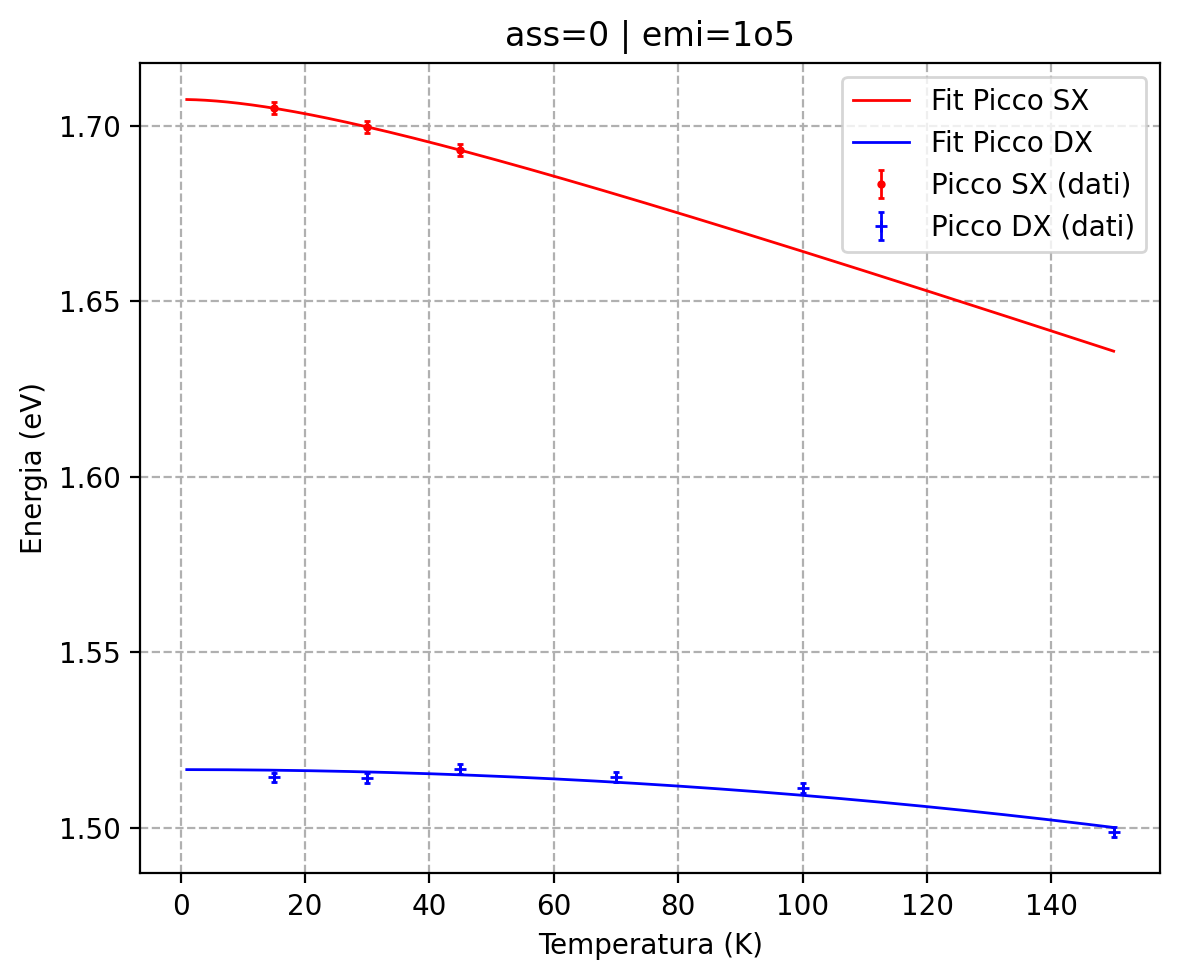

Parametri fit picco SX:
E_0 = 1.7074869483932376 ± 0.005084951662407434 ; alpha = 0.0006040980209436833 ± 0.0012404636603653072 ; beta = 39.57997326376434 ± 196.52504201268727
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.516603998788355 ± 0.0007514265334275709 ; alpha = 54.31574555487506 ± 5.3423686138713835 ; beta = 74138764.6298903 ± 3.913931245133429e-06
• Chi quadro: 9.218
• Gradi di libertà: 3
• Chi quadro ridotto: 3.073
• p-value: 2.653e-02


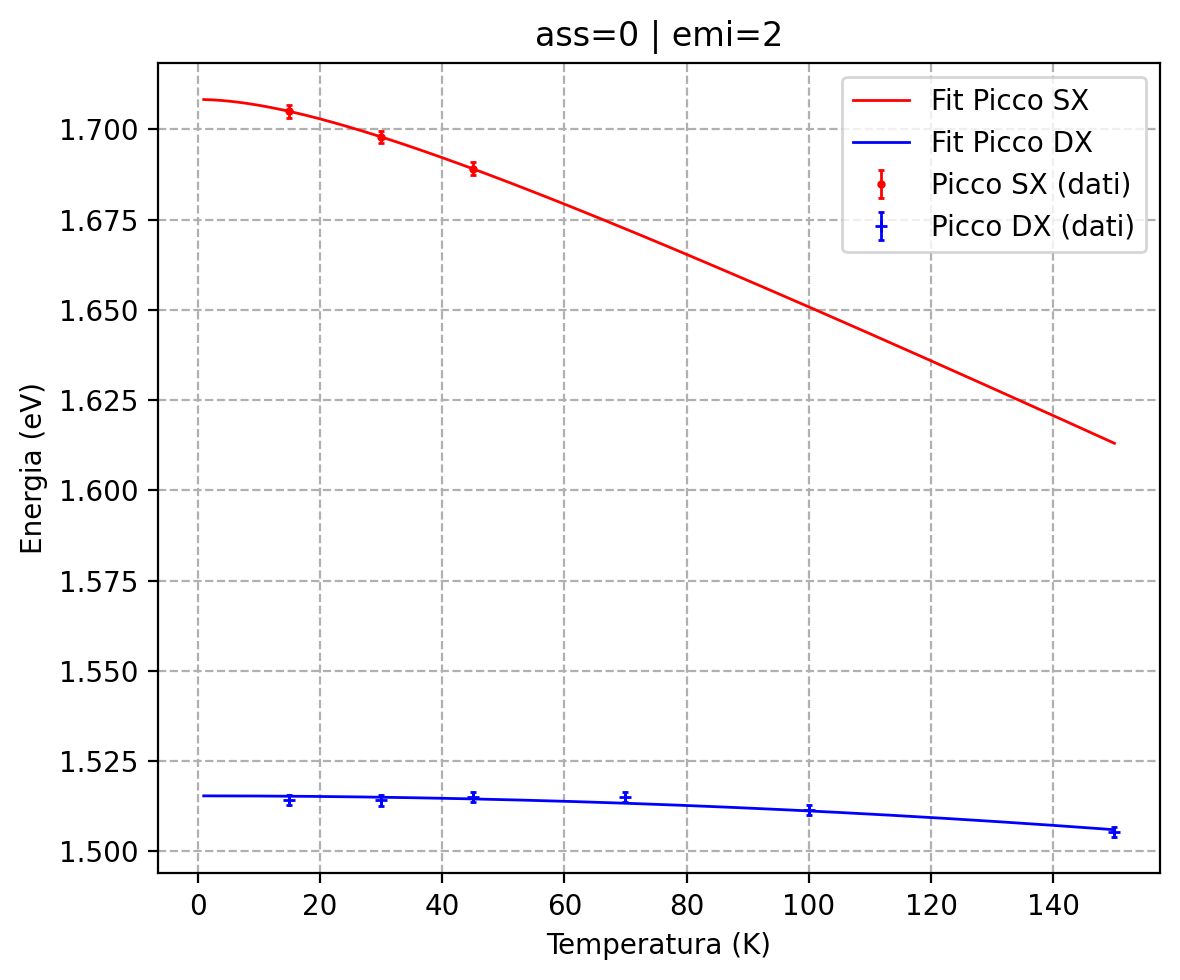

Parametri fit picco SX:
E_0 = 1.7082625914567884 ± 0.005068157723047405 ; alpha = 0.0008033762254292035 ± 0.0012452411054927723 ; beta = 39.80837950362591 ± 148.67683919775385
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5153825931777951 ± 0.0007514240576097506 ; alpha = 11.553692000866583 ± 2.0082665940331133 ; beta = 27707250.8547471 ± 8.37426173153219e-07
• Chi quadro: 2.954
• Gradi di libertà: 3
• Chi quadro ridotto: 0.985
• p-value: 3.987e-01


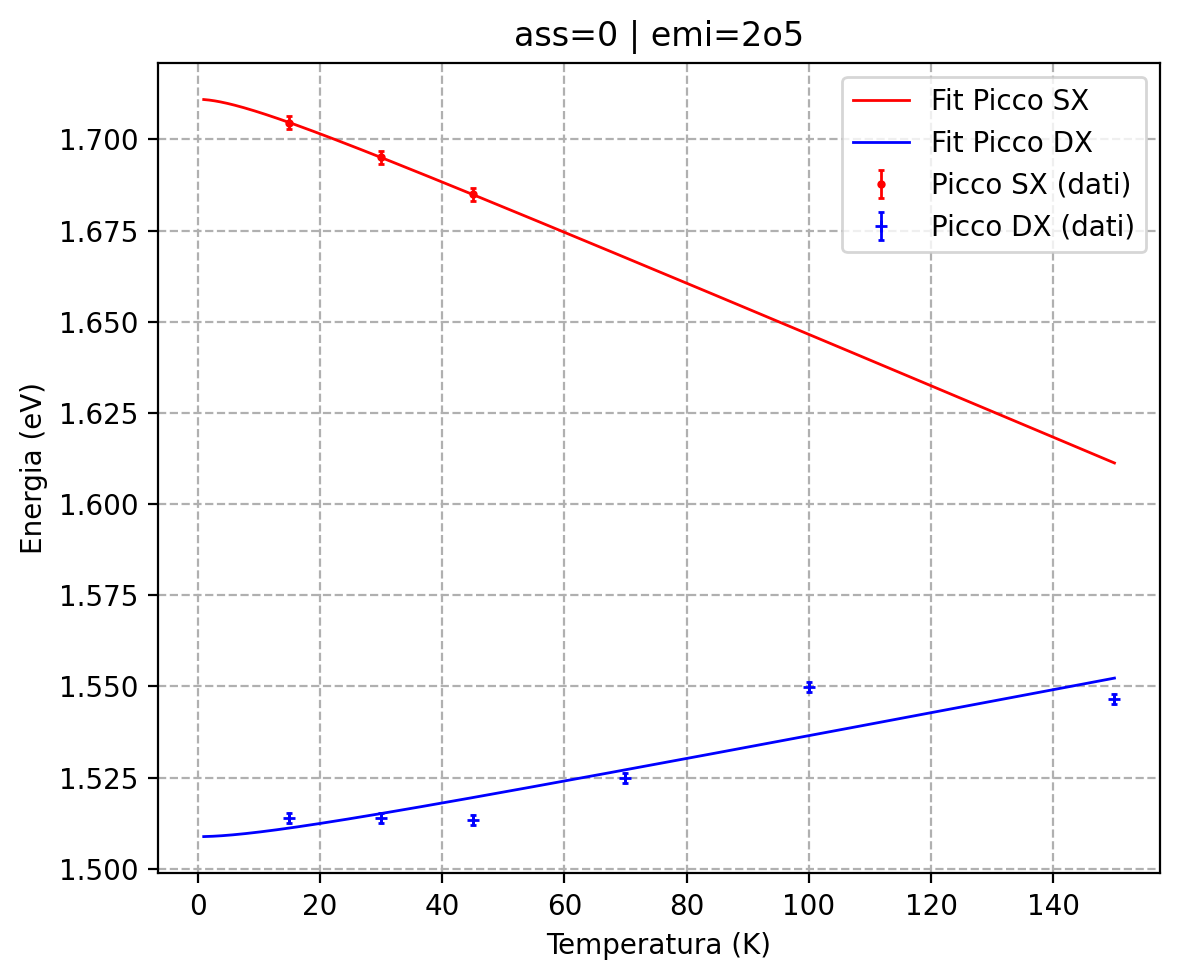

Parametri fit picco SX:
E_0 = 1.710985631531183 ± 0.01155013144633434 ; alpha = 0.0007093502373107463 ± 0.00045953633031618605 ; beta = 10.033041376087587 ± 57.44659275861057
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.508785869419088 ± 0.0026058270132214446 ; alpha = -0.0003196136206905524 ± 3.170450201451927e-05 ; beta = 15.401710478461462 ± 21.943889042071028
• Chi quadro: 127.019
• Gradi di libertà: 3
• Chi quadro ridotto: 42.340
• p-value: 0.000e+00


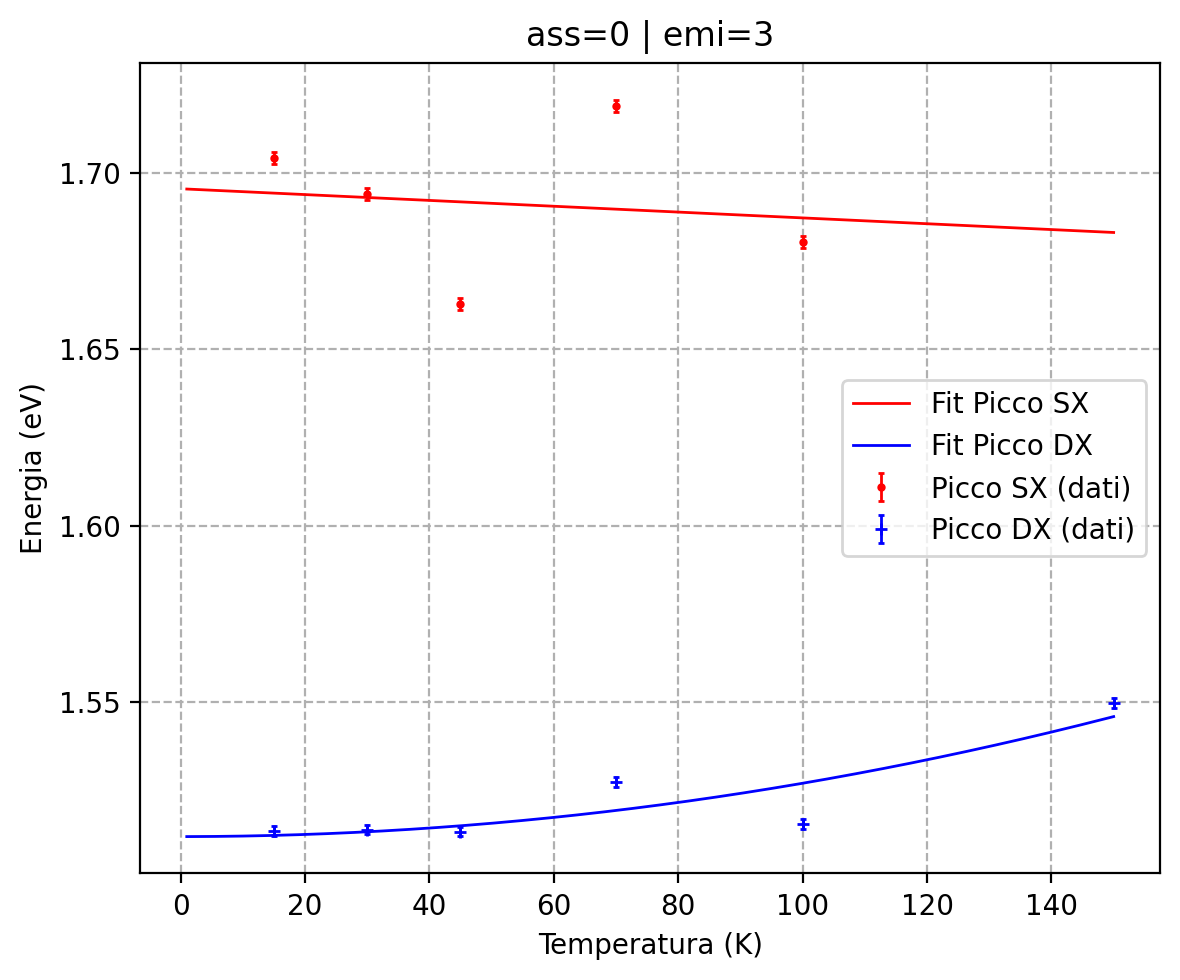

Parametri fit picco SX:
E_0 = 1.6954216325622928 ± 4.919575841561235 ; alpha = 8.258131683468612e-05 ± 4.27084825212333e-05 ; beta = 0.005509423112253622 ± 59617.01101056902
• Chi quadro: 616.063
• Gradi di libertà: 2
• Chi quadro ridotto: 308.031
• p-value: 0.000e+00
Parametri fit picco DX:
E_0 = 1.511942335647967 ± 0.0007551077019098909 ; alpha = -261.05651562633284 ± 13.035482697965232 ; beta = 172816524.24029383 ± 1.9691379331956083e-05
• Chi quadro: 110.222
• Gradi di libertà: 3
• Chi quadro ridotto: 36.741
• p-value: 0.000e+00


In [79]:
for ass in d_o_ass:
    
    ass = 'ass=' + ass
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        emi = 'emi=' + emi
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0 and not np.isnan(y_val)]
        
        y1 = [y_val for y_val in y1 if y_val != 0 and not np.isnan(y_val)]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0 and not np.isnan(e_y_val)]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0 and not np.isnan(y_val)]
        y2 = [y_val for y_val in y2 if y_val != 0 and not np.isnan(y_val)]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0 and not np.isnan(e_y_val)]
        
        # HACK: il 100K in ass=0 emi=2o5 va tolto perché sballa tutto
        if ass=='ass=0' and emi=='emi=2o5':
            x1.pop()
            y1.pop()
            err_y1.pop()
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Fit del primo picco - Parametri iniziali?
        popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Fit del secondo picco
        popt2, pcov2 = curve_fit(varshni, x2, y2, sigma=err_y2, absolute_sigma=True, p0=[x2[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Errori sui parametri
        perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
        perr2 = np.sqrt(np.diag(pcov2))  # Errori per il secondo picco

        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(6, 5), dpi=200)
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Fit Picco SX')

        # Plot del secondo picco e del suo fit
        plt.errorbar(x2, y2, yerr=err_y2, fmt='b+', label='Picco DX (dati)', markersize=4, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt2), 'b-', linewidth=1, label='Fit Picco DX')

        # Aggiungere etichette e legenda
        # HACK: ho invertito emi e ass, li inverto e poi li ri-inverto
        help = emi
        emi = ass
        ass = help
        
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()
        
        ass = emi
        emi = help
        
        # Mostrare il grafico
        plt.tight_layout()
        plt.show()
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        ## Residui del picco DX
        residui2 = y2 - varshni(x2, *popt2)
        chi2_2 = np.sum((residui2 / err_y2) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl2 = len(y2) - len(popt2)

        # Chi quadro ridotto
        chi2_ridotto2 = chi2_2 / gdl2
        
        # valore p
        p_value2 = 1 - chi2.cdf(chi2_2, gdl2)
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")       
        print("Parametri fit picco DX:")
        print("E_0 =", popt2[0], '±', perr2[0], "; alpha =", popt2[1], '±', perr2[1], "; beta =", popt2[2], '±', perr2[2])
        print(f"• Chi quadro: {chi2_2:.3f}")
        print(f"• Gradi di libertà: {gdl2}")
        print(f"• Chi quadro ridotto: {chi2_ridotto2:.3f}")
        print(f"• p-value: {p_value2:.3e}")  
        
        arr_e_0_sx.append(popt1[0])
        arr_e_0_dx.append(popt2[0])
        arr_err_e_0_sx.append(perr1[0])
        arr_err_e_0_dx.append(perr2[0])

### Stampa E_0

In [72]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [73]:
arr_e_0_sx

[1.710855816888146,
 1.7070748414770252,
 1.7065459745365317,
 1.7074869483932376,
 1.7082625914567884,
 1.710985631531183,
 1.6954216325622928]

#### Errori E_0 SX

In [74]:
arr_err_e_0_sx

[0.001328829499187689,
 0.0017605451716324752,
 0.003533001590667958,
 0.005084951662407434,
 0.005068157723047405,
 0.01155013144633434,
 4.919575841561235]

#### E_0 ricavati da Picco DX

In [75]:
arr_e_0_dx

[1.517770547811789,
 1.5167238953583246,
 1.516585218885907,
 1.516603998788355,
 1.5153825931777951,
 1.508785869419088,
 1.511942335647967]

#### Errori E_0 DX

In [76]:
arr_err_e_0_dx

[0.0007528359880072443,
 0.0007517305887360971,
 0.0007515224236655031,
 0.0007514265334275709,
 0.0007514240576097506,
 0.0026058270132214446,
 0.0007551077019098909]

Provo a calcolare il chi-quadro di questi valori; il residuo sarà la distanza dalla media pesata. N-1 gradi di libertà. (N=6)

In [77]:
# media pesata
m_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)
err_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))
m_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)
err_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))
print('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)

# la media pesata non è un valore esatto
# Errore totale considerando anche l'errore sulla media
sigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)
sigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)

# residui
residui_sx = arr_e_0_sx - m_p_sx
chi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)
residui_dx = arr_e_0_dx - m_p_dx
chi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)

# chi quadro ridotti
chi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)
chi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)

medie pesate: sx= 1.7091526560930153 | dx= 1.5157430739885163


In [78]:
print('chi2 ridotto SX =', chi2_rid_sx)
print('chi2 ridotto DX =', chi2_rid_dx)

chi2 ridotto SX = 0.4665547376826693
chi2 ridotto DX = 0.36627066136842873
